In [143]:
#pip install plotly

In [144]:
#Impotando bibliotecas
import plotly.graph_objects as go
import pandas as pd
import numpy as np

## Análise Explorátoria dos dados

In [145]:
#importando os dados e visualizando
uri = "https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv"
dados = pd.read_csv(uri)
dados.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [146]:
#Forma dos dados
dados.shape

(178, 14)

In [147]:
#traduzinho as colunas
traducao = {"Alcohol":"Alcool", 
            "Malic_Acid": "Acido_malico",
            "Ash": "Po",
            "Ash_Alcanity": "Alcalinidade_Po",
            "Magnesium": "Magnesio",
            "Total_Phenols": "total_fenolicos",
            "Flavanoids":"Flavanoides",
            "Nonflavanoid_Phenols": "nao_flavonoide_fenolicos",
            "Proanthocyanins":"Proantocianidinas",
            "Color_Intensity": "Intensidade_cor",
            "Hue": "Matiz",
            "OD280":"OD280"
           }

In [148]:



#aplicando
dados = dados.rename(columns=traducao)
dados.head()

,Alcool,Acido_malico,Po,Alcalinidade_Po,Magnesio,total_fenolicos,Flavanoides,nao_flavonoide_fenolicos,Proantocianidinas,Intensidade_cor,Matiz,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [149]:
#Análise estatística 
dados.describe()

,Alcool,Acido_malico,Po,Alcalinidade_Po,Magnesio,total_fenolicos,Flavanoides,nao_flavonoide_fenolicos,Proantocianidinas,Intensidade_cor,Matiz,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### Matriz de correlação

In [150]:
matriz_corr = dados.corr()

In [151]:
#como a visualização não é tao agradavel, vamos utilizar a bilbioteca biokit
#antes de importar tive que instalar pelo prompt da anaconda pip install biokit
from biokit.viz import corrplot
import matplotlib.pyplot as plt

<ipython-input-152-8ef43b4a0c42>:7: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



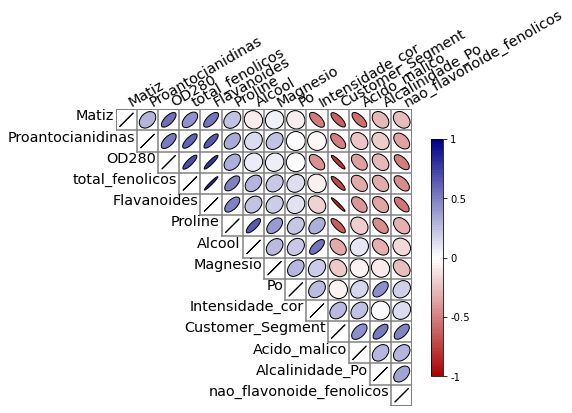

In [152]:
corr_graph = corrplot.Corrplot(matriz_corr)
#Definindo que quero somente a matriz de correlação superior
corr_graph.plot(upper = 'ellipse', fontsize = 'x-large')

fig = plt.gcf() #utilizando matplot pra pegar a figura
fig.set_size_inches(13,8) #alterando o tamanho
fig.show()

Podemos entender quais elementos tem uma forte correlação tanto positva quanto negativa;

Positiva: quando um aumenta o o outro também aumenta

Negativa: No caso quando um aumenta o o outro diminui

### Podemos observar que, os dados variam de uma forma diferente, entao antes de rodar o modelo precisamos normalizar os dados

In [153]:
#nsse caso os dados vao variar de 0 a 1
#verificando nossos atributos
atributos = dados.columns
atributos

Index(['Alcool', 'Acido_malico', 'Po', 'Alcalinidade_Po', 'Magnesio',
       'total_fenolicos', 'Flavanoides', 'nao_flavonoide_fenolicos',
       'Proantocianidinas', 'Intensidade_cor', 'Matiz', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [154]:
#vamos normalizar utilizando mean max scaler(normalização pelo minino e max)
for atributo in atributos:
    dados[atributo] = (dados[atributo] - min(dados[atributo]))/(max(dados[atributo])-min(dados[atributo]))

In [155]:
dados.head()

,Alcool,Acido_malico,Po,Alcalinidade_Po,Magnesio,total_fenolicos,Flavanoides,nao_flavonoide_fenolicos,Proantocianidinas,Intensidade_cor,Matiz,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [156]:
dados.describe()

,Alcool,Acido_malico,Po,Alcalinidade_Po,Magnesio,total_fenolicos,Flavanoides,nao_flavonoide_fenolicos,Proantocianidinas,Intensidade_cor,Matiz,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [157]:
# Outra forma de normalizar os dados e pela biblioteca sklearn
from sklearn import preprocessing

In [158]:
min_max_scaler = preprocessing.MinMaxScaler()
#Transformando os dados para np array
np_dados = min_max_scaler.fit_transform(dados)

In [159]:
#Agora para o pandas
dados = pd.DataFrame(np_dados, columns = atributos)
dados.head()

,Alcool,Acido_malico,Po,Alcalinidade_Po,Magnesio,total_fenolicos,Flavanoides,nao_flavonoide_fenolicos,Proantocianidinas,Intensidade_cor,Matiz,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [160]:
dados.describe()

,Alcool,Acido_malico,Po,Alcalinidade_Po,Magnesio,total_fenolicos,Flavanoides,nao_flavonoide_fenolicos,Proantocianidinas,Intensidade_cor,Matiz,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**volta os dados antes de sererm trasnformados (desnormarlização)*

np_dados = min_max_scaler_inverse_transform(dados)

### Utilizando K means

In [161]:
#importando
from sklearn.cluster import KMeans

In [162]:
# 4 clusters refre-se o numero de consumidores (grupos)
agrupador  = KMeans(n_clusters=4)
agrupador.fit(dados)

KMeans(n_clusters=4)

In [163]:
#verificando as etiqueta dos agrupamentos
labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 3 1 3 3 3 1 3 1 3 3 3
 3 1 3 1 3 3 3 3 1 1 3 3 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 1 3 1 3 1 3 1 3 3 3
 3 1 1 3 1 3 3 1 3 3 3 3 3 3 3 3 1 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [164]:
#vamos plotar para melhorar a visualização
fig = go.Figure()
fig.add_trace(go.Scatter(x = dados['Intensidade_cor'], y=dados['Alcool'],
                       mode= 'markers', marker = dict(color = agrupador.labels_.astype(np.float)),
                       text = labels))
fig.show()

<ipython-input-164-3fe9a56949e0>:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Podemos visualizar alguns grupos proximos um do outro, porém nao podemos tirar nenhum insight, pois só estamos observando tres dimensoes, precisamos entender se a distância dos pontos é real significativa.

In [165]:
# Separando em tres grupos
agrupador = KMeans(n_clusters=3)
agrupador.fit(dados)
labels = agrupador.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [166]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dados['Intensidade_cor'], y = dados['Alcool'],
                        mode = 'markers', marker = dict(color = agrupador.labels_.astype(float)),
                        text = labels))

In [167]:
# Gráfico com três dimensoes
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = dados['Intensidade_cor'], y = dados['Alcool'], z = dados['Proline'], 
                          mode = 'markers', marker = dict(color = labels.astype(float)),
                          text = labels))

fig.show()

In [168]:
#adicionando nome dos eixos
fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de cor',
    yaxis_title = 'Álcool',
    zaxis_title = 'Proline'
))
fig.show()

In [169]:
#colocando centro dos clusters
centros = pd.DataFrame(agrupador.cluster_centers_) #agrupador refre-se aos 3 grupos(clusters)
centros.columns = atributos 
centros.head()

,Alcool,Acido_malico,Po,Alcalinidade_Po,Magnesio,total_fenolicos,Flavanoides,nao_flavonoide_fenolicos,Proantocianidinas,Intensidade_cor,Matiz,OD280,Proline,Customer_Segment
0,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000
1,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
2,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333


In [170]:
fig.add_trace(go.Scatter3d(x = centros['Intensidade_cor'],
                           y = centros['Alcool'],
                           z = centros['Proline'],
                           mode = 'markers',
                           marker = dict(color = 'red'),
                           text = [0,1,2] ))

fig.show()

Podemos ver que estão distribuidos os pontos centrais. Porém, seria mellhor que, a quantidade de grupos fosse mais que 3, pois podemos ver pontos de grupos muito perto entre si

### Utilizando DBSCAN

recomendando com dados de dimensoes pequenas e com um tipo fixo de dados,se variarem muito nao é bom

In [171]:
#Impportando
from sklearn.cluster  import DBSCAN

In [172]:
#eps distancia maxima para que eles sejam considerados vizinhos ou pertencente ao mesmo cluster
# numero minimo de pontos que eu possa forma um cluster
# metric e a avaliar distancia entre os pontos
agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
agrupador.fit(dados)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [173]:
#vendo os labels
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

Grupo menos 1 retrata uma amostra definida como ruído, entao qualquer ponto que nao esteja na distancia de 1.31 é um ruido

In [174]:
# vendo quais sao os labels
np.unique(agrupador.labels_)

array([-1,  0,  1,  2], dtype=int64)

In [175]:
# Fazendo um novo modelo DBSCAN
#manhattan faz a função da distancia  assim sum(|x - y|)
#min é 15, se nao chegar a formar agrupamentos ate 15 n vira o cluster
agrupador = DBSCAN(eps = 1.5, min_samples = 15, metric = 'manhattan')
agrupador.fit(dados)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

Métricas de distância do sklearn dbscan

Do scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]

### Mean Shift
método consiste em nao ter q parametrizar tanto o modelo, robusto a outlier, serve pra varios tipo de aplicacoes e nao é bom com dados com muitas dimensoes

In [176]:
#importando
from sklearn.cluster import MeanShift

In [177]:
#instancionado
agrupador = MeanShift()
agrupador.fit(dados)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [178]:
#passando alguns parametros para rodar legal
from sklearn.cluster import estimate_bandwidth

In [179]:
BW = estimate_bandwidth(dados, quantile = 0.5)
agrupador = MeanShift(BW)
agrupador.fit(dados)
agrupador.labels_

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass bandwidth=1.1322358239471637 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [180]:
#quantil defini qual ponto da regiao de busca.
#pequeno busca maior numero de cluster ex 0.1
#grande menor numero de cluster ex 0.8

### Coeficiente de Silhueta para kmeans

como saber se a clusterização feita foi boa? Quanto maior o valor da silhueta é melhor 

In [181]:
agrupador = KMeans(n_clusters=  5)
agrupador.fit(dados)
labels = agrupador.labels_

In [182]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = dados['Intensidade_cor'], 
                           y = dados['Alcool'],
                           z = dados['Proline'],
                           mode = 'markers',
                           marker = dict(color = labels.astype(float) ),
                           text = labels))
fig.show()

Vemos pontos de cores iguais que estao mais proximos de outras cores, possivelmente pertencem ao grupo erraod. Nisso vamos avaliar com novo modelo

In [183]:
#importando a bilbioteca
from sklearn.metrics import silhouette_score

In [184]:
#criando faixa
faixan_n_cluster = [i for i in range(2,10)]
print(faixan_n_cluster)

[2, 3, 4, 5, 6, 7, 8, 9]


In [185]:
#uma lista para armazenar os valores do modelo
valores_silhuetta = []
for k in faixan_n_cluster:
    agrupador = KMeans(n_clusters = k)
    labels = agrupador.fit_predict(dados)
    media_silhueta = silhouette_score(dados, labels)
    valores_silhuetta.append(media_silhueta) #adicionando os valores para media silhueta
    

In [186]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = faixan_n_cluster, y=valores_silhuetta))
fig.update_layout(
  title = "Valores de Silhuetta médios",
  xaxis_title = "Número de Clusteres",
  yaxis_title = "Valor médio de silhueta")

Podemos ver que o melhor resultado do modelo é quando definimos 3 clusteres somente

### Coeficiente de Silhueta para mean shift

In [187]:
#criando a faixa linear
faixa_quantil = np.linspace(0.02, 0.5, 30)
faixa_quantil

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

In [188]:
#criando a lista
#para checar o numero de labels e igual a 1 e se e menor que o numero de amostras que temos nos dados, nisso vamos criar um if
valores_silhuetta = []
quantil_plot = []
for quantil in faixa_quantil:
    bandwidth = estimate_bandwidth(dados, quantile = quantil)
    agrupador = MeanShift(bandwidth)
    labels = agrupador.fit_predict(dados)
    if(len(np.unique(labels)) < len(dados) and len(np.unique(labels)) > 1):  
        media_silhueta = silhouette_score(dados, labels)
        valores_silhuetta.append(media_silhueta)
        quantil_plot.append(quantil)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass bandwidth=0.41407073402433764 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass bandwidth=0.49002627383760716 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass bandwidth=0.5304660110980739 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass bandwidth=0.5598939783789139 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pas

In [189]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot, y =valores_silhuetta))
fig.update_layout(dict(xaxis_title = "Quantil",
                       yaxis_title= "Média Silhueta"))

fig.show()

melhor  quantil de 0.18 da modelo aprentou 0.18. nesse caso descartamos meanshift pois e muito baixo 

### Comparando todos modelos
KMeans - MeanShift - DBSCAN - estimate bandwidth

In [190]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [191]:
agrupador_kmeans = KMeans(n_clusters=3)
agrupador_dbscan = DBSCAN(eps = 2.1, min_samples=56, metric ='manhattan')

BW = estimate_bandwidth(dados, quantile=0.28)
agrupador_meanshift = MeanShift(bandwidth= BW)

labels_kmeans = agrupador_kmeans.fit_predict(dados)
labels_dbscan = agrupador_dbscan.fit_predict(dados)
labels_meanshift = agrupador_meanshift.fit_predict(dados)

print("Labels Kmeans ", labels_kmeans)
print("Labels DBSCAN ", labels_dbscan)
print("Labels meanshift ", labels_meanshift)

Labels Kmeans  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels DBSCAN  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1  0
  0 -1  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels meanshift  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [192]:
print("O coenfieciente de silhouetta do KMeans é ", silhouette_score(dados, labels_kmeans))
print("O coenfieciente de silhouetta do DBSCAN é ", silhouette_score(dados, labels_dbscan))
print("O coenfieciente de silhouetta do MeanShift é ", silhouette_score(dados, labels_meanshift))

O coenfieciente de silhouetta do KMeans é  0.36950618492736303
O coenfieciente de silhouetta do DBSCAN é  0.3016232115094375
O coenfieciente de silhouetta do MeanShift é  0.3059152866115628


O melhor modelo é do KMeans, os demais podem ter sido baixo devido o tamanho do conjunto de dados